<a href="https://colab.research.google.com/github/dianakang/DIANA_Pandas/blob/master/Do_it_Pandas_12_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차

*   12.1. 데이터 집계
  *   12.1.1. 데이터 집계하기
  *   12.1.2. 분할 - 반영 - 결합 과정 살펴보기 
  *   12.1.3. groupby 메서드와 함께 사용하는 집계 메서드
  *   12.1.4. age 메서드로 사용자 함수와 groupby 메서드 조합하기
  *   12.1.5. datetime 오브젝트로 변환하기 - read_csv 메서드
  *   12.1.6. datetime 오브젝트에서 날짜 정보 추출하기
  *   12.1.7. dt 접근자 사용하기

*   12.2. 시계열 데이터 계산하기
  *   12.2.1. 에볼라 최초 발병일 계산하기
  *   12.2.2. 파산한 은행의 개수 계산하기
  *   12.2.3. 테슬라 주식 데이터로 시간 계산하기
  *   12.2.4. datetime 오브젝트와 인덱스 - DatetimeIndex
  *   12.2.5. 시간 간격과 인덱스 - TimedeltaIndex
  *   12.2.6. 시간 범위와 인덱스
  *   12.2.7. 시간 범위 수정하고 데이터 밀어내기 - shift 메서드


---

# 12. 시계열 데이터

시계열 데이터는 데이터 분석 분야에서 중요하게 다루는 데이터 중 하나이다. 

지금까지 다룬 날씨 관측 데이터, 에볼라 전염병으로 인한 사망자 수 관측 데이터, 빌보드 차트 데이터에는 모두 시계열 데이터가 포함되어 있었다.

즉, 일정 시간 간격으로 어떤 값을 기록한 데이터에서는 시계열 데이터가 매우 중요하다.

## 12.1. datetime 오브젝트

datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리이다.

datetime 라이브러리에는 날짜를 처리하는 date 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간을 모두 처리하는 datetime 오브젝트가 포함되어 있다.

### 12.1.1. datetime 오브젝트 사용하기

1. datetime 오브젝트를 사용하기 위해 datetime 라이브러리를 불러온다.

In [1]:
# datetime 라이브러리 불러오기
from datetime import datetime

2. now, today 메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있다.

In [2]:
now1 = datetime.now()     ## now() 사용
print(now1)

now2 = datetime.today()  ## today() 사용 
print(now2)

2021-03-13 06:35:32.620275
2021-03-13 06:35:32.620881


3. 다음은 datetime 오브젝트를 생성할 때 시간을 직접 입력하여 인자로 전달한 것이다.

  각 변수를 출력하여 확인해 보면 입력한 시간을 바탕으로 datetime 오브젝트가 생성된 것을 알 수 있다.

In [3]:
t1 = datetime.now()   ##  now 메서드는 밀리초 단위까지 구한다.
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2021-03-13 06:35:32.648332
1970-01-01 00:00:00
1970-12-12 13:24:34


4. **datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다**는 점이다.

  다음은 두 datetime 오브젝트의 차이를 구한 것이다.

In [4]:
# 두 datetime 오브젝트의 차이 구하기
diff1 = t1 - t2
print(diff1)
print(type(diff1))

print("-"*50)

diff2 = t2 - t1
print(diff2)
print(type(diff2))

18699 days, 6:35:32.648332
<class 'datetime.timedelta'>
--------------------------------------------------
-18700 days, 17:24:27.351668
<class 'datetime.timedelta'>


### 12.1.2. 문자열을 datetime 오브젝트로 변환하기 - to_datetime 메서드

경우에 따라서는 시계열 데이터를 문자열로 저장해야 할 때도 있다.

하지만 **문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해 주어야 한다.**

이번에는 to_datetime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환하는 방법에 대해 알아보자.

In [5]:
# 1. 데이터 불러오기
import pandas as pd
import os

ebola = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/country_timeseries.csv')

In [6]:
# 2. 데이터 정보 확인하기
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

-> Date 열이 문자열(object) 형태로 되어있다는 것을 알 수 있다.



---
3. to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환할 수 있다. 

  다음과 같이 to_datetime 메서드를 사용하여 Date 열의 자료형을 datetime 오브젝트로 변환한 다음 ebola 데이터프레임에 새로운 열로 추가한다.

  


In [7]:
# Date 열의 자료형은 datetime 오브젝트로 변환한 후, 새로운 열로 추가
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

4. to_datetime 메서드를 좀 더 자세히 알아보자. 시간 형식 지정자(%d, %m, %y)와 기호(/,-)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있다.

In [8]:
# 시간 형식 지정자 사용하여 datetime 오브젝트 얻기
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)


test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15
  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


### 12.1.3. 시간 형식 지정자

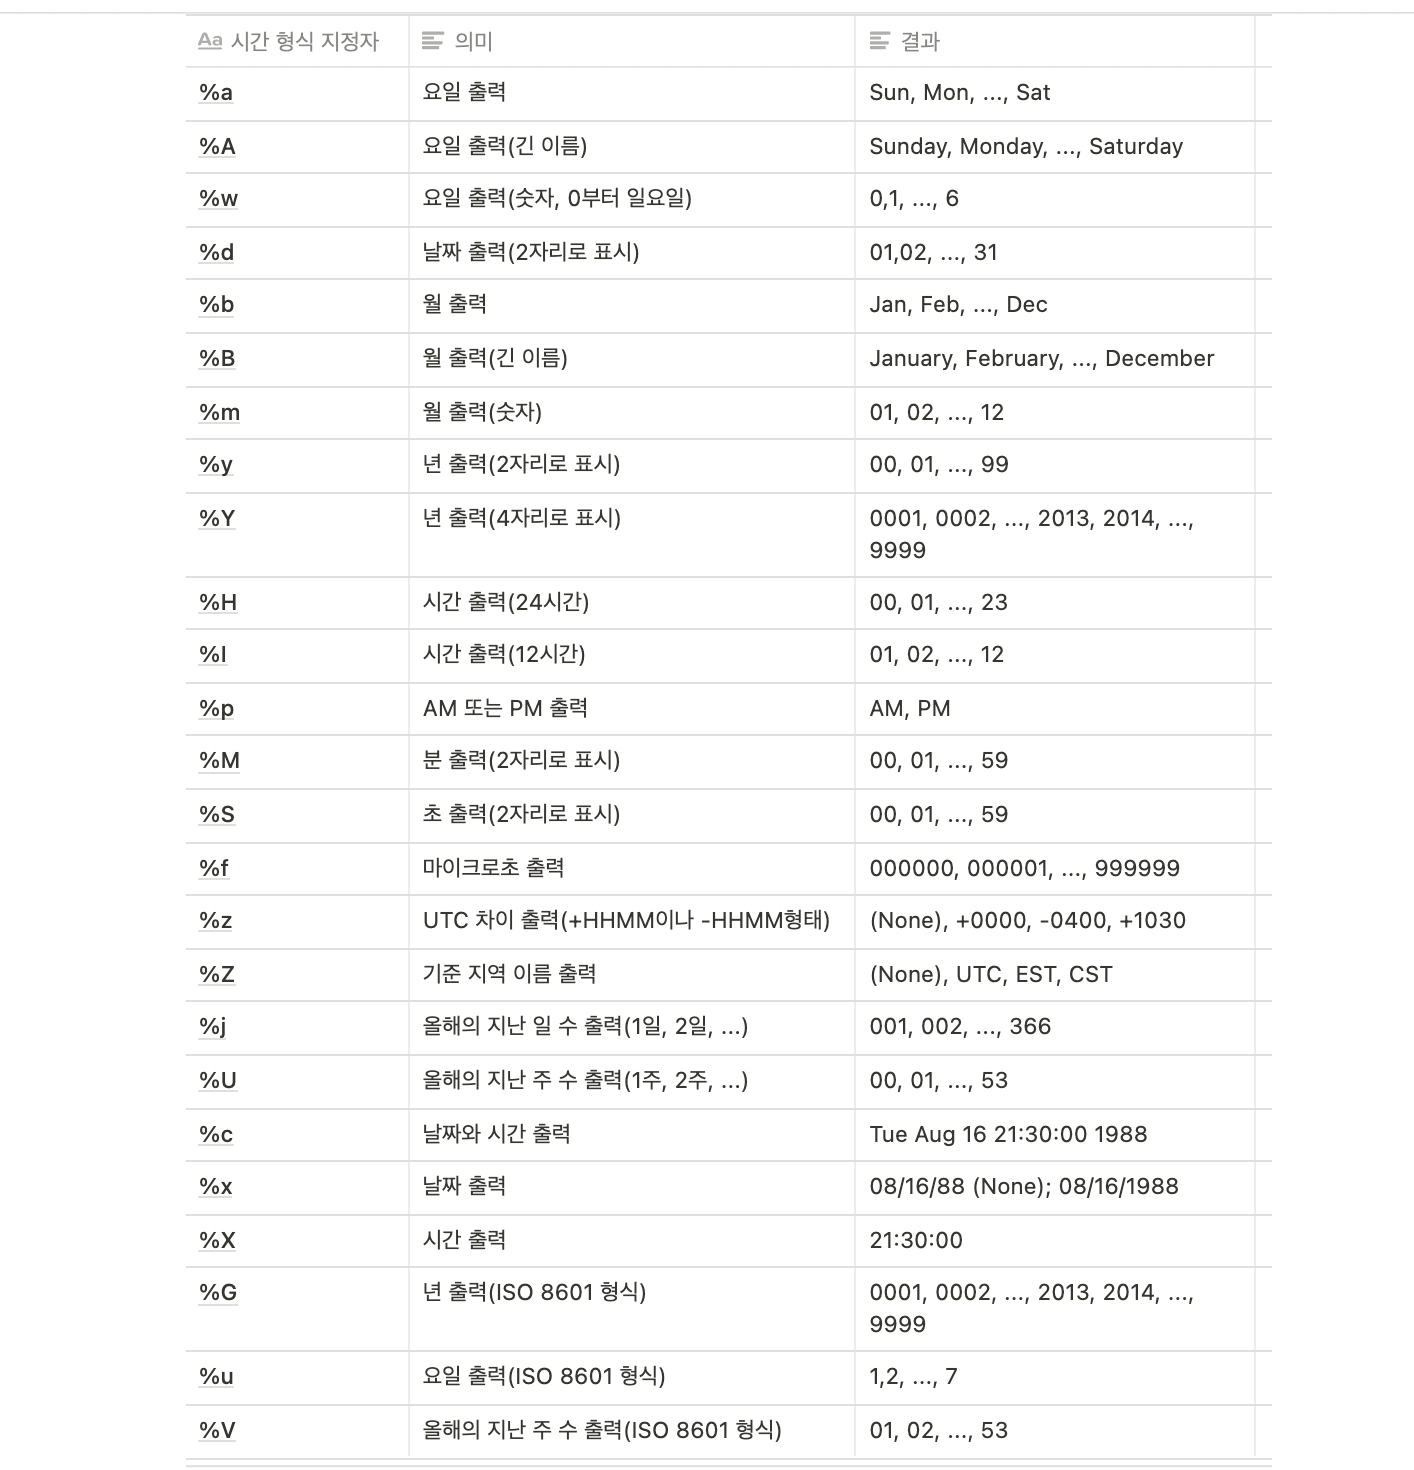

### 12.1.4. 시계열 데이터 구분하여 추출하기

**now 메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지 시간을 표현한다.** 하지만 원하는 시계열 데이터의 시간 요소가 연도, 월, 일뿐이라면 now 메서드로 얻은 시계열 데이터를 잘라내야한다. 

다음은 **strftime 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라낸 것이다.**

In [9]:
# strftime 메서드 & 시간 형식 지정자 이용 시계열 데이터 추출
now = datetime.now()   ## now() -> 날짜  시간(시분초)
print(now)

nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

nowTime = now.strftime('%H:%M:%S')
print(nowTime)

nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2021-03-13 06:35:33.634921
2021-03-13
06:35:33
2021-03-13 06:35:33


### 12.1.5.  datetime 오브젝트로 변환하기 - read_csv 메서드

앞에서는 to_datetime 메서드를 사용하여 문자열로 저장되어 있는 Date 열을 datetime 오브젝트로 변환했다. 

하지만 **datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더 간단하다.**



---

다음은 read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러온 것이다.


In [10]:
# parse_dates 인자로 'Date' 불러와서 데이터 형태 확인하기
ebola1 = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/country_timeseries.csv', parse_dates=['Date'])
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

-> 결과를 보면 Date 열이 문자열이 아니라 datetime 오브젝트라는 것을 확인할 수 있다.

### 12.1.6. datetime 오브젝트에서 날짜 정보 추출하기

datetime 오브젝트에는 년, 월, 일과 같은 날짜 정보를 따로 저장하고 있는 속성이 이미 준비되어있다. 

그럼 다음 실습을 통해 datetime 오브젝트에서 날짜 정보를 하나씩 추출해보자.

1. 다음은 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환한 것이다.

In [11]:
# 시리즈 생성하여 날짜 형식으로 변환
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

2. **datetime 오브젝트(d1)의 year, month, day 속성을 이용**하면 **년, 월, 일 정보를 바로 추출**할 수 있다..

In [12]:
print(d1[0].year)   ## year 속성 이용
print(d1[0].month)  ## month 속성 이용
print(d1[0].day)    ## day 속성 이용

2018
5
16


### 12.1.7. dt 접근자 사용하기

문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용해야 했다. 

**datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있다.**

1. 먼저 ebola 데이터 집합을 불러온 다음 Date 열을 datetime 오브젝트로 변환하여 새로운 열(date_dt)로 추가한다.

In [13]:
# 데이터 불러오고 새로운 열 생성하기
ebola = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/country_timeseries.csv')  ##  데이터 불러오기
ebola['date_dt'] = pd.to_datetime(ebola['Date'])  ## Date 열을 datetime 오브젝트로 변환하여 새로운 열 생성하기

2. 다음은 dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출한 것이다.

In [14]:
print(ebola[['Date', 'date_dt']].head())

# 인덱스가 3인 데이터의 년, 월, 일 데이터 추출
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


3. 위의 과정은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편하다.
  
  다음은 **dt 접근자로 date_dt 열에 한 번에 접근**한 다음 year 속성을 이용하여 연도값을 추출한 것이다. 

  추출한 연도값은 ebola 데이터프레임의 새로운 열(year)로 추가했다.

In [15]:
# ebola 년도 추출
ebola['year'] = ebola['date_dt'].dt.year
ebola[['Date', 'date_dt', 'year']].head()

,Date,date_dt,year
0,1/5/2015,2015-01-05,2015
1,1/4/2015,2015-01-04,2015
2,1/3/2015,2015-01-03,2015
3,1/2/2015,2015-01-02,2015
4,12/31/2014,2014-12-31,2014


4. 다음은 위의 과정을 응용하여 월, 일 데이터를 한 번에 추출해서 새로운 열(month, day)로 추가한 것이다. 

In [16]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)   ## 달 추출, 날짜 추출
ebola[['Date','date_dt','year','month','day']].head()

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3
3,1/2/2015,2015-01-02,2015,1,2
4,12/31/2014,2014-12-31,2014,12,31


5. 마지막으로 ebola 데이터프레임에 새로 추가한 date_dt, year, month, day 열의 자료형을 출력해보자.

In [17]:
# 데이터 자료형 출력
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

-> date_dt 열은 datetime 오브젝트이고, 나머지는 정수형이라는 것을 알 수 있다.

## 12.2. 시계열 데이터 계산하기

### 12.2.1. 에볼라 최초 발병일 계산하기

1. ebola 데이터프레임을 살펴보자. 데이터가 시간 역순으로 정렬되어 있다. 즉, 시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴봐야한다. 

In [18]:
# 데이터 확인
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05,2015,1,5
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04,2015,1,4
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03,2015,1,3
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02,2015,1,2
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31,2014,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,2014-03-27,2014,3,27
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-26,2014,3,26
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-25,2014,3,25
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-24,2014,3,24


2. 121행에서 볼 수 있듯이 에볼라가 발생하기 시작한 날은 2014년 3월 22일이다. 다음은 **min 메서드를 사용하여 에볼라의 최초 발병일**을 찾은 것이다.

In [19]:
print(ebola['date_dt'].min())   ## min 메서드 -> 최초 발병일 찾기
print(type(ebola['date_dt'].min()))  ## Timestamp는 Datetime 오브젝트와 호환되는 자료형이다.

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


3. 에볼라의 최초 발병일을 알아냈으니 Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있다. 

  (사실 ebola 데이터프레임의 Day 열에는 이 값이 저장되어 있다.)

In [20]:
# 에볼라 진행 정도 = (Date 열) - (에볼라 최초 발병일)
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
ebola[['Date', 'Day', 'outbreak_d']].head()

,Date,Day,outbreak_d
0,1/5/2015,289,289 days
1,1/4/2015,288,288 days
2,1/3/2015,287,287 days
3,1/2/2015,286,286 days
4,12/31/2014,284,284 days


### 12.2.2. 파산한 은행의 개수 계산하기

1. 파산한 은행 데이터 집합을 불러오면 Closing Date, Updated Date 열의 데이터 자료형이 시계열 데이터라는 것을 알 수 있다.

In [21]:
# 데이터 불러와서 확인하기
banks = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/banklist.csv')
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


2. Closing Date, Updated Date 열의 데이터 자료형은 문자열이다. 

  다음은 read_csv 메서드의 **parse_dates 속성을 이용하여 문자열로 저장된 두 열을 datetime 오브젝트로 변환**하여 불러온 것이다.

In [22]:
# 원본 데이터 불러와서 확인하기 -> 날짜가 object(문자열) 형태로 되어있음
banks_no_dates = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/banklist.csv')
print(banks_no_dates.info())

# parse_dates 속성 이용 -> 날짜를 datetime 형태로 변환
banks = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/banklist.csv', parse_dates=[5,6])   ## parse_dates = 날짜를 datetime 형태로 변환하는 속성
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null 

3. dt 접근자와 quarter 속성을 이용하면 은행이 파산한 분기를 알 수 있다. 

  다음은 dt접근자와 year, quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가한 것이다.

In [23]:
# dt접근자+ year, quarter 속성 이용 -> closing_quarter, closing_year 열 추가
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


4. 연도별로 파산한 은행의 개수를 확인하기 위해서는 groupby 메서드를 사용하면 된다.

In [24]:
# 연도별로 파산한 은행 개수 확인하기
closing_year = banks.groupby(['closing_year']).size()   ## .size() : 전체 원소의 개수 반환
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

5. **각 연도별, 분기별로 파산한 은행의 개수**도 알아보자. 다음은 banks 데이터프레임을 연도별로 그룹화 한 다음 다시 분기별로 그룹화하여 출력한 것이다.

In [25]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()  ## size() 메서드 : 전체 원소의 개수 반환
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

6. 다음은 위의 과정에서 얻은 값으로 그래프를 그린 것이다.

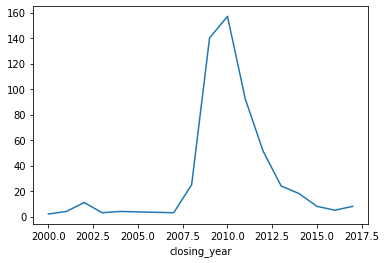

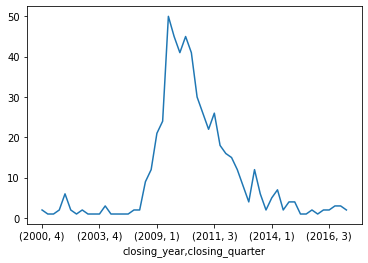

In [26]:
# 그래프 그리기
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()   ## 파산은행 수 - 년도 그래프
plt.show()


fig, ax = plt.subplots()
ax = closing_year_q.plot()  ## 파산은행 - 분기 그래프
plt.show()

### 12.2.3. 테슬라 주식 데이터로 시간 계산하기

1. quandl 라이브러리 설치하기



In [27]:
pip install quandl

2. pandas-datareader 라이브러리 설치하여 주식 데이터 불러오기

In [28]:
pip install pandas-datareader

3. 다음은 get_data_quandl 메서드에 TSLA라는 문자열을 전달하여 테슬라의 주식 데이터를 내려받은 다음 to_csv 메서드를 사용하여 data 폴더 안에 'tesla_stock_quandl.csv'라는 이름으로 저장한다.

In [29]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

tesla = pdr.get_data_quandl('TSLA', api_key = 'Tb3uCZ-1MbRX1nh_qej2')

tesla.to_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/tesla_stock_quandl.csv')
tesla.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


-> tesla 데이터프레임의 Date 열은 문자열로 저장되어 있다. 즉, datetime 오브젝트로 자료형을 변환해야 시간 계산을 할 수 있다. 

4. Date 열을 Datetime 형으로 변환하려면 read_csv 메서드로 데이터 집합을 불러올 때 parse_dates 인자에 Date 열을 전달하면 된다.

In [30]:
# Date 열을 Datetime 형태로 변환시키기 -> parse_dates 인자에 Date 열 전달
tesla = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/tesla_stock_quandl.csv', parse_dates=[0])  ## parse_dates = 날짜를 datetime 형태로 변환하는 속성
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        513 non-null    datetime64[ns]
 1   Open        513 non-null    float64       
 2   High        513 non-null    float64       
 3   Low         513 non-null    float64       
 4   Close       513 non-null    float64       
 5   Volume      513 non-null    float64       
 6   ExDividend  513 non-null    float64       
 7   SplitRatio  513 non-null    float64       
 8   AdjOpen     513 non-null    float64       
 9   AdjHigh     513 non-null    float64       
 10  AdjLow      513 non-null    float64       
 11  AdjClose    513 non-null    float64       
 12  AdjVolume   513 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 52.2 KB


-> Date 열의 자료형이 datetime 오브젝트로 변환되었다. 그럼 이제 dt 접근자를 사용할 수 있다.


5. 다음은 불린 추출로 2018년 3월의 데이터만 추출한 것이다.

In [31]:
# 불린 추출로 18년 3월 데이터 추출하기
tesla.loc[(tesla.Date.dt.year == 2018) & (tesla.Date.dt.month == 3)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.27,277.1800,279.18,13696168.0,0.0,1.0,304.00,304.27,277.1800,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.3600,304.18,8324639.0,0.0,1.0,307.34,307.59,291.3600,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.4500,301.54,6600538.0,0.0,1.0,311.25,311.61,300.4500,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.1800,309.10,4914307.0,0.0,1.0,313.89,318.82,308.1800,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.1900,316.53,5927881.0,0.0,1.0,310.25,322.44,310.1900,316.53,5927881.0
5,2018-03-20,314.87,316.25,308.7600,310.55,4726182.0,0.0,1.0,314.87,316.25,308.7600,310.55,4726182.0
6,2018-03-19,316.50,320.75,309.6700,313.56,7440766.0,0.0,1.0,316.50,320.75,309.6700,313.56,7440766.0
7,2018-03-16,325.96,327.40,319.0700,321.35,6058612.0,0.0,1.0,325.96,327.40,319.0700,321.35,6058612.0
8,2018-03-15,329.38,332.85,321.1000,325.60,6366922.0,0.0,1.0,329.38,332.85,321.1000,325.60,6366922.0
9,2018-03-14,336.76,339.81,323.9300,326.63,7932511.0,0.0,1.0,336.76,339.81,323.9300,326.63,7932511.0


### 12.2.4. datetime 오브젝트와 인덱스 -DatetimeIndex

지금까지는 대부분 데이터프레임의 행 번호를 인덱스로 사용했지만 **datetime 오브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있어 편리하다.**

이번에는 **datetime 오브젝트를 인덱스로 지정하는 방법**에 대해 알아보자.

In [32]:
# Date 열을 인덱스로 지정
tesla.index = tesla['Date']
tesla.index

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2016-03-28', '2016-03-24', '2016-03-23', '2016-03-22',
               '2016-03-21', '2016-03-18', '2016-03-17', '2016-03-16',
               '2016-03-15', '2016-03-14'],
              dtype='datetime64[ns]', name='Date', length=513, freq=None)

datetime 오브젝트를 인덱스로 지정하면 다음과 같은 방법으로 원하는 시간의 데이터를 바로 추출할 수 있다. 다음은 2018년의 데이터를 추출한 것이다.

In [33]:
# 2018년의 데이터 추출하기
tesla['2018'].iloc[:5, :5]

,Date,Open,High,Low,Close
Date,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53


In [34]:
# 2018년의 3월 데이터 추출하기
tesla['2018-03'].iloc[:, :5]

,Date,Open,High,Low,Close
Date,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.1800,279.18
2018-03-26,2018-03-26,307.34,307.59,291.3600,304.18
2018-03-23,2018-03-23,311.25,311.61,300.4500,301.54
2018-03-22,2018-03-22,313.89,318.82,308.1800,309.10
2018-03-21,2018-03-21,310.25,322.44,310.1900,316.53
2018-03-20,2018-03-20,314.87,316.25,308.7600,310.55
2018-03-19,2018-03-19,316.50,320.75,309.6700,313.56
2018-03-16,2018-03-16,325.96,327.40,319.0700,321.35
2018-03-15,2018-03-15,329.38,332.85,321.1000,325.60


### 12.2.5. 시간 간격과 인덱스 - TimedeltaIndex

예를 들어 주식 데이터에서 최초 5일간 수집된 데이터만 살펴보고 싶다면 어떻게 해야 할까? 이런 경우에는 **시간 간격을 인덱스로 지정하여 데이터를 추출**하면 된다. 이번에는 datetime 오브젝트를 인덱스로 지정하는 것이 아니라 시간 간격을 인덱스로 지정하여 진행해보자.

---

Date 열에서 Date 열의 최소값(2010-06-29)을 빼면 데이터를 수집한 이후에 시간이 얼마나 흘렀는지 알 수 있다. 

다음은 Date 열에서 Date 열의 최소값을 뺀 다음 ref_date 열로 추가한 것이다.


In [35]:
# Date 열 - Date 열 최소값 = ref_date 열 추가
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.head

<bound method NDFrame.head of                  Date    Open    High  ...  AdjClose   AdjVolume  ref_date
Date                                   ...                                
2018-03-27 2018-03-27  304.00  304.27  ...    279.18  13696168.0  743 days
2018-03-26 2018-03-26  307.34  307.59  ...    304.18   8324639.0  742 days
2018-03-23 2018-03-23  311.25  311.61  ...    301.54   6600538.0  739 days
2018-03-22 2018-03-22  313.89  318.82  ...    309.10   4914307.0  738 days
2018-03-21 2018-03-21  310.25  322.44  ...    316.53   5927881.0  737 days
...               ...     ...     ...  ...       ...         ...       ...
2016-03-18 2016-03-18  229.10  234.48  ...    232.74   4711793.0    4 days
2016-03-17 2016-03-17  221.47  228.50  ...    226.38   3782891.0    3 days
2016-03-16 2016-03-16  218.00  222.58  ...    221.93   3516703.0    2 days
2016-03-15 2016-03-15  214.27  218.97  ...    218.34   3180452.0    1 days
2016-03-14 2016-03-14  212.65  216.72  ...    215.15   4065706.0    0 

In [36]:
# ref_date열을 인덱스로 지정 -> 시간 간격 파악하기
tesla.index = tesla['ref_date']
tesla.iloc[:5, :5]

,Date,Open,High,Low,Close
ref_date,,,,,
743 days,2018-03-27,304.00,304.27,277.18,279.18
742 days,2018-03-26,307.34,307.59,291.36,304.18
739 days,2018-03-23,311.25,311.61,300.45,301.54
738 days,2018-03-22,313.89,318.82,308.18,309.10
737 days,2018-03-21,310.25,322.44,310.19,316.53


In [37]:
# 데이터 수집 이후 최초 5일의 데이터 추출
tesla['5 days':].iloc[:5, :5]

,Date,Open,High,Low,Close
ref_date,,,,,
4 days,2016-03-18,229.10,234.48,228.06,232.74
3 days,2016-03-17,221.47,228.50,220.00,226.38
2 days,2016-03-16,218.00,222.58,217.02,221.93
1 days,2016-03-15,214.27,218.97,211.50,218.34
0 days,2016-03-14,212.65,216.72,210.64,215.15


### 12.2.6. 시간 범위와 인덱스

앞에서 사용한 테슬라 주식 데이터는 특정 일에 누락된 데이터가 없었다.

하지만 가끔은 데이터를 수집하지 못한 날도 있을 수 있다. 그렇다면 이렇게 **특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보기 위해서는** 어떻게 해야 할까?

이런 경우에는 **임의로 시간 범위를 생성하여 인덱스로 지정**해야 한다.

In [38]:
# 앞쪽 데이터 살펴보기
ebola = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/country_timeseries.csv', parse_dates=[0])  ## parse_dates = 날짜를 datetime 형태로 변환하는 속성
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [39]:
# 뒤쪽 데이터 살펴보기
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


->  전반적으로 ebola 데이터는 누락값이 많다는 것을 알 수 있다. 



---

다음은 date_range 메서드를 사용하여 2014년 12월 31일부터 2015년 01월 05일 사이의 시간 인덱스(DatetimeIndex)를 생성한 것이다.

In [40]:
# date_range()-> 시간 인덱스 생성
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

다음은 원본 데이터를 손상시키는 것을 방지하기 위해 ebola 데이터프레임의 앞쪽 5개의 데이터를 추출하여 새로운 데이터프레임을 만든 것이다.

이때 Date 열을 인덱스로 먼저 지정하지 않으면 오류가 발생한다. 반드시 Date 열을 인덱스로 지정한 다음, 위에서 생성한 시간 범위를 인덱스로 지정해야 한다.

In [41]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']  ## Date열을 인덱스로 지정 -> 반드시 먼저 해야함!
ebola_5.reindex(head_range)   ##  reindex() : 인덱스의 재배치 / head_range는 위에서 지정했음.
ebola_5.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286,NaN,8157.0,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0


 
*   **시간 범위의 주기 설정하기**

: 시간 범위를 인덱스로 지정하면 DatetimeIndex 자료형이 만들어진다. 그리고 DatetimeIndex에는 freq 속성이 포함되어 있다. freq 속성값을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있다. 아래에는 freq 속성값으로 사용할 수 있는 시간 주기이다.
*   freq 속성값으로 사용할 수 있는 시간 주기
  *   B : 평일만 포함
  *   C : 사용자가 정의한 평일만 포함
  *   D : 달력 일자 단위
  *   W : 주간 단위
  *   M : 월 마지막 날만 포함
  *   SM : 15일과 월 마지막 날만 포함
  *   BM : M 주기의 값이 휴일이면 제외하고 평일만 포함
  *   CBM : BM에 사용자 정의 평일을 적용
  *   MS : 월 시작일만 포함
  *   SMS : 월 시작일과 15일만 포함
  *   BMS : MS 주기의 값이 휴일이면 제외하고 평일만 포함
  *   CBMS : BMS에 사용자 정의 평일을 적용
  *   Q : 3,6,9,12월 분기 마지막 날만 포함
  *   BQ : 3,6,9,12월 분기 마지막 날이 휴일이면 제외하고 평일만 포함
  *   QS : 3,6,9,12월 분기 시작일만 포함
  *   BQS : 3,6,9,12월 분기 시작일이 휴일이면 제외하고 평일만 포함
  *   A : 년의 마지막 날만 포함
  *   BA : 년의 마지막 날이 휴일이면 제외하고 평일만 포함
  *   AS : 년의 시작일만 포함
  *   BAS : 년의 시작일이 휴일이면 제외하고 평일만 포함
  *   BH : 평일을 시간 단위로 포함(09:00 ~ 16:00)
  *   H : 시간 단위로 포함 (00:00 ~ 00:00)
  *   T : 분 단위 포함
  *   S : 초 단위 포함
  *   L : 밀리초 단위 포함
  *   U : 마이크로초 단위 포함
  *   N : 나노초 단위 포함


In [42]:
# date_range 메서드의 freq 인자값으로 B 설정 -> 평일만 포함시킨 DatetimeIndex를 만들기
pd.date_range('2017-01-01', '2017-01-07', freq = 'B')

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')

### 12.2.7. 시간 범위 수정하고 데이터 밀어내기 - shift 메서드

나라별로 에볼라의 확산 속도를 비교하기 위해서는 발생하기 시작한 날짜를 옮기는 것이 좋다. 

우선 ebola 데이터프레임으로 그래프를 그려본 후, 에볼라의 확산 속도를 비교하는 데 어떤 문제가 있는지 그리고 해결 방법은 무엇인지 알아보자.

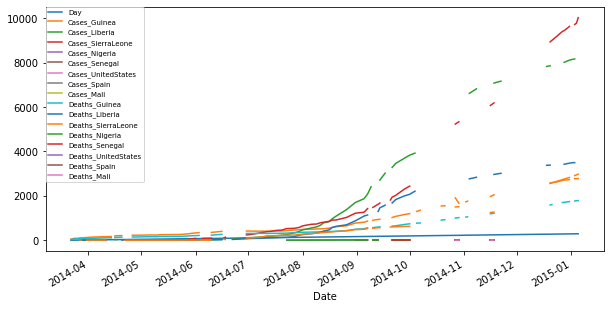

In [64]:
# Date 열을 인덱스로 지정하고  x축을 Date 열로, y축을 사망자 수로 설정한 그래프 그리기

import matplotlib.pyplot as plt 
ebola.index = ebola['Date']  ## Date 열을 인덱스로 지정

fig, ax = plt.subplots(figsize=(10, 5))
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)  # borderaxespad => 범례 조정
plt.show()

하지만 위의 그래프는 각 나라의 에볼라 발병일이 달라 그래프가 그려지기 시작한 시점이 다르다.

즉, 확산 속도를 같은 방법으로 측정하기 위해서는 각 나라의 발병일을 에볼라가 가장 처음 발병한 Guinea와 동일한 위치로 옮겨야한다. 

In [65]:
# Day, Cases_Guinea, Cases_Liberia 열 추출하여 확인하기
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
ebola_sub.tail((10))

,Day,Cases_Guinea,Cases_Liberia
Date,,,
2014-03-31,9.0,122.0,8.0
NaT,NaN,NaN,NaN
2014-03-29,7.0,112.0,7.0
2014-03-28,6.0,112.0,3.0
2014-03-27,5.0,103.0,8.0
2014-03-26,4.0,86.0,NaN
2014-03-25,3.0,86.0,NaN
2014-03-24,2.0,86.0,NaN
NaT,NaN,NaN,NaN


다음은 Date 열의 자료형을 datetime 오브젝트로 변환하여 ebola 데이터프레임을 다시 생성한 것이다. 

그런데 중간에 아예 날짜가 없는 데이터(2015년 01월 01일)도 있다. 이 데이터도 포함시켜야 확산 속도를 제대로 비교할 수 있다.

In [66]:
# 그래프를 그리기 위한 데이터프레임 준비하기
ebola = pd.read_csv('/content/drive/MyDrive/pandas/doit_pandas-master/data/country_timeseries.csv', parse_dates=['Date'])
print(ebola.head().iloc[:, :5])
print(ebola.tail().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


다음은 Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최대값과 최소값으로 시간 범위를 생성하여 new_idx에 저장한 것이다. 

이렇게 하면 날짜가 아예 없었던 데이터의 인덱스를 생성할 수 있다.

In [67]:
# ebola 데이터프레임의 Date 열(인덱스)의 최대값과 최소값으로 시간 범위를 생성하여 new_idx에 저장
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

그런데 new_idx를 살펴보면, ebola 데이터 집합에 있는 시간 순서와 반대로 생성되어 있다.

다음은 시간 순서를 맞추기 위해 reversed 메서드를 사용하여 인덱스를 반대로 뒤집은 것이다.


In [68]:
# new_idx (인덱스) 확인하기
print(new_idx)

new_idx = reversed(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


다음은 reindex 메서드를 사용하여 새로 생성한 인덱스(new_idx)를 새로운 인덱스로 지정한 것이다.

그러면 2015년 1월 1일 데이터와 같은 ebola 데이터프레임에 아예 없었던 날짜가 추가된다.

이제 그래프를 그리기 위한 데이터프레임이 준비되었다.

(참고! 시간에 대한 누락값은 NaT이다.)

In [69]:
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:, :5])

print(ebola.tail().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 

다음은 last_valid_index, first_valid_index 메서드를 사용하여 각 나라의 에볼라 발병일을 구한 것이다. 

각각의 메서드는 유효한 값이 있는 첫 번째와 마지막 인덱스를 반환한다. 

In [70]:
# 각 나라의 에볼라 발병일 구하기

## 가장 오래된 데이터 가져오기
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

print("-"*100)

## 가장 최근의 데이터 가져오기
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]
----------------------------------------------------------------------------------------------------
Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain        

각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날(earliest_date)에서 각 나라의 에볼라 발병일을 뺀 만큼(shift_values)만 옮기면 된다.

In [71]:
# 에볼라 최초 발병일 구하기
earliest_date = ebola.index.min()
print(earliest_date)

print("-"*100)

# 각 나라별 에볼라 발병일 구하기 = (각 나라별 최초 발병일 데이터) - (에볼라 (자체) 최초 발병일)
shift_values =  last_valid - earliest_date
print(shift_values)

2014-03-22 00:00:00
----------------------------------------------------------------------------------------------------
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


이제 각 나라의 에볼라 발병일을 옮기면 된다. 다음은 shift 메서드를 사용하여 모든 열의 값을 shift_values 값만큼 옮긴 것이다. **shift 메서드는 인자값만큼 데이터를 밀어내는 메서드이다.**

In [72]:
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)   ## shift 메서드 = 호출하는 값을 내려준다. / 데이터를 밀어낸다. 
  ebola_dict[col] = shifted

ebola_dict에는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장되어 있다.

다음은 DataFrame 메서드를 사용하여 ebola_dict의 값을 데이터프레임으로 변환한 것이다.

In [73]:
# DataFrame 메서드로 ebola_dict의 값을 데이터프레임으로 변환
ebola_shift = pd.DataFrame(ebola_dict)

이제 에볼라의 최초 발병일(2014-03-22)을 기준으로 모든 열의 데이터가 옮겨졌다.

In [74]:
ebola_shift.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2014-03-26,2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-23,NaT,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


마지막으로 인덱스를 Day 열로 지정하고 그래프에 필요 없는 Date, Day 열은 삭제하면 그래프를 그리기 위한 데이터프레임이 완성된다.

In [75]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)  ## Date, Day 열 삭제 / axis=1 을 통해 x축이 Day로 변경되었음.
ebola_shift.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


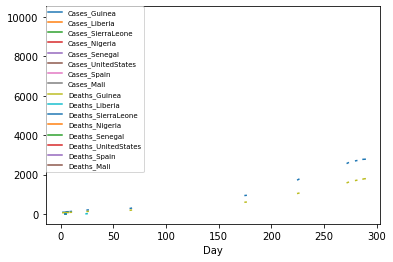

In [77]:
# 그래프 그리기
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()



---

---

판다스 라이브러리는 시간을 다룰 수 있는 다양한 기능을 제공한다.

이번 12장에서는 시계열 데이터와 깊은 연관성이 있는 에볼라 데이터 및 주식 데이터를 주로 다루었다.

우리 주변의 상당수의 데이터는 시간과 깊은 연관성이 있는 경우가 많다.

시계열 데이터를 능숙하게 다루는 것은 데이터 분석가의 기본 소양이므로 이번 챕터의 내용을 반드시 익혀두자!
